## What is "Dimensionality Reduction Problem"? Why is it necessary in Machine Learning?

Ans: a dataset can have maximum numbers of features and the more numbers of features the more it will be difficult to visualize and analysis for further proces,so to reduce the dimension, dimensional reduction is used and it reduce dimension without losing much information.
while making model in machine learning for prediction or classification a model may have many features and some features may be overlap so we can remove overlaping features because if a dataset have lots of features it will be difficult to get accuracy model and difficult for visualization so we need to reduce the dimensions and for this purpose dimensionality reduction come into action for reducing dimensional with losing important feature.

## What is PCA? Discuss few applications in Machine Learning... 

Ans: Principal component analysis is a technique used for dimensional reduction that enable to identify the corelation and pattern in the dataset which transform the dataset into lower dimension dataset without losing any important infromation or feature from the dataset.Principal component analysis doesnt perform any feature elimination rather it extract the important feature from the dataset and create lesser number of principal components. to perform principal components it use orthogonal transformation to convert the set of correlation variable into linearly uncorrelation variable.
the steps in principal component analysis are
1. starndardization: standardization is a technique which scale the data in such a ways that all the value of the dataset lies with in the small range.it is calculated by subtraction each value of variable with the mean and dividing by the standard deviation.
2. Covarience matrix computing: a covarience matrix shows the relation between different variable in the dataset. it is important to find variable which are heavily dependent because it may contain redundent information which may impact the performance of the model.if the varience is negative they are indirectly proportional but if the varience is positive it has directly proportional.
3. calculating the eigenvalue and eigenvector:for computing principal component of the data we need to calculate eigenvector and eigenvalue of the coviarience matrix. eigenvector is used to calculate and identify the principal commponents and eigenvalue represent the scalar representation of the eigenvector.
4. Computing the principal components:once the eigenvalue and eigenvector is been calculated we need to order in descending order and the eigenvector having highest eigenvalue we be hightest principal component and the least value princpal component can be removed to decrease dimensionality.
5. reducing the dimension of the dataset:the final step is to rearrange the original dataset with the principal components having significant infromation.for replacing we just need to multiply transpose of the original dataset with the teanspose feature vector.

Principal componennt analysis is used in machine learning to reduce the dimensional of feature vector of the dataset so that it will be easy for visualization and get clear idea of what is the next step.  principal component used for dimensional reduction on many appliation like image processing , computer vision as well as in different field like data mining, finance etc where the dimension of the dataset is very high.

## Write Short notes on the following topics:<br>
    a) Variance & Covariance
    Ans: Variance tells us how much quantity varies with respect to its mean.we only know magnitude through variance .it is the spread of the data around the mean value. varience can used to measure for measuring the probability of any future event.
    covariance shows the direction in which the two quantities vary with each other.Suppose two variable have positive covariance then they increase or decrease together. covarience measures the directional relationship between two variables. a positive covarience means the they move in the same direction where as negative covarience means they move to opposite direction.
    b) Eigenvalues & Eigenvectors
    Ans:An eigenvector of an matrix A is a nonzero vector x such that for some scalar λ. A scalar λ is called an eigenvalue of A if there is a nontrivial solution x of Ax = λx such an x is called an eigenvector corresponding to λ.Eigenvalues are coefficients applied to eigenvectors that give the vectors their length or magnitude
    c) Eigen-value decomposition
    Ans: eigenvector decomposition plays an important role in mathematics which is a part of the factorization technique which aim to decompose (sometimes complex) mathematical objects as a product of several factors, usually smaller or simpler objects of the same kind. In this case, a matrix is decomposed into a more natural basis.
    d) Singular-value decompsition
    Ans: Singular value decomposition is a method of decomposing a matrix into three other matrices.The singular value decomposition of a matrix A is the factorization of A into the product of three matrices A = UDV T where the columns of U and V are orthonormal and the matrix D is diagonal with positive real entries. The SVD is useful in many tasks.
    e) EVD vs SVD
    Ans:The SVD arises from asking in which directions a linear transformation has the greatest impact. The eigendecomposition arises from asking in which directions a quadratic form has the greatest impact. 
    f) Orthogonal Projections
    Ans: a two-dimensional graphic representation of an object in which the projecting lines are at right angles to the plane of the projection called orthogonal projection
    g) PCA vs LDA
    Ans: LDA is supervised where as PCA is supervised.
    PCA is a technique that finds direction of maximal variance where as LDA is a technique that cares about the class separation 

# Implementation of PCA

## Some Basic Theory

## Orthogonal Projections

projection of a vector $\boldsymbol x$ onto a 1-dimensional subspace $U$ with basis vector $\boldsymbol b$ we have

$${\pi_U}(\boldsymbol x) = \frac{\boldsymbol b\boldsymbol b^T}{{\lVert\boldsymbol  b \rVert}^2}\boldsymbol x $$

And for the general projection onto an M-dimensional subspace $U$ with basis vectors $\boldsymbol b_1,\dotsc, \boldsymbol b_M$ we have

$${\pi_U}(\boldsymbol x) = \boldsymbol B(\boldsymbol B^T\boldsymbol B)^{-1}\boldsymbol B^T\boldsymbol x $$

where 

$$\boldsymbol B = [\boldsymbol b_1,...,\boldsymbol b_M]$$

## projection of a vector  x  onto a 1-dimensional subspace  U  with basis vector  b  we have

In [ ]:
from fractions import Fraction as f
def projection_matrix_1d(b):
   n_norm = np.sqrt(sum(b**2))  
 
   proj_of_x_on_u = round(np.dot(x.transpose(),b))/round(n_norm**2)
 

   return proj_of_x_on_u;
    

finding the projection of x=[2,1] on b=[1,2] 

In [ ]:

import numpy as np
b=np.array([2,1])
x=np.array([1,2])

print(projection_matrix_1d(b),b)


0.8 [2 1]


## the general projection onto an M-dimensional subspace  U  with basis vectors  b1,…,bM  we have

In [ ]:
import numpy as np
from numpy.linalg import matrix_power
def project_general(x):
  b1=np.array([1,2,0])
  b2=np.array([1,1,0])
  B=np.stack((b1,b2),axis=1)
  B_transpose_x=np.dot((B.transpose()), x)
  B_transpose_B_inverse=np.dot((B.transpose()),B)
  q=matrix_power(B_transpose_B_inverse, -1)

  lamda=np.dot(q,B_transpose_x)
  w=lamda.item(0)
  u=lamda.item(1)
  projection_u_on_x=w*b1+u*b2
  return projection_u_on_x


    

finding projection of x=[2,1,1] on two basis sub vector b1=[1,2,0] and b2=[1,1,0]

In [ ]:
x=np.array([2,1,1])
project_general(x)

array([2., 1., 0.])

Assume that we are performing PCA on
some dataset $\boldsymbol X$ for $M$ principal components. 
We then need to perform the following steps, which we break into parts:

1. Data normalization (`normalize`).
2. Find eigenvalues and corresponding eigenvectors for the covariance matrix $S$.
   Sort by the largest eigenvalues and the corresponding eigenvectors (`eig`).

After these steps, we can then compute the projection and reconstruction of the data onto the spaced spanned by the top $n$ eigenvectors.

## Why normalization is necessary in PCA?

$$\bar X =  \frac{X - \mu}{\sigma}$$
Ans:The PCA calculates a new projection of your data set. And the new axis are based on the standard deviation of your variables. So a variable with a high standard deviation will have a higher weight for the calculation of axis than a variable with a low standard deviation. If you normalize your data, all variables have the same standard deviation, thus all variables have the same weight and your PCA calculates relevant axis.
As different variables in your data set may be having different units of measurement. Eg: one may be cost, other production in numbers, another percentage interest in purchase etc. It is necessary to normalise data to get a reasonable covarianc analysis among all such variables. Another example to appreciate the normalisation is analysis of students data in a class room may include...height and weight and establishing a correlation between them.


Now, Lets use this idea using numpy :)

## Warning: Do not import other libraries ....!

## Step 1: Load the data & required libraries

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [ ]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 8)

In [ ]:
#load the given iris data here:

import pandas as pd
iris=pd.read_csv("iris.csv")
iris.dropna(how="all", inplace=True) 
iris.head()
# Class 0 is sepal length, Class 1 is sepal width
# Class 2 is petal length, Class 3 is petal width

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target_class"]
iris.dropna(how ='all', inplace = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target_class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   target_class  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


# Step 2: Data Visualization

Text(0, 0.5, 'sepal_width')

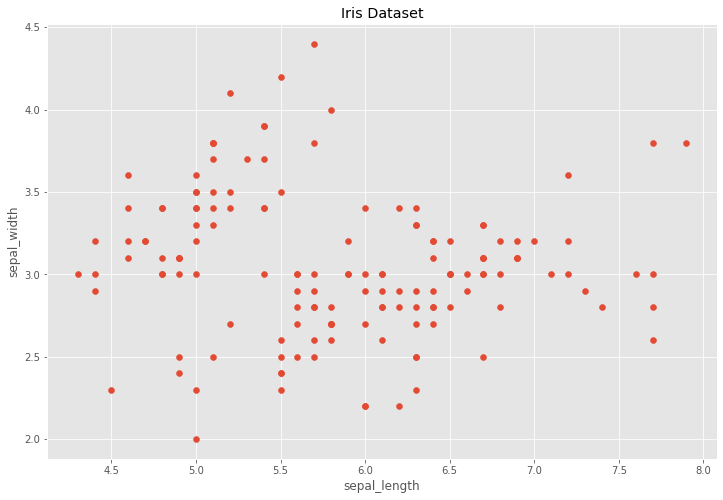

In [ ]:
#use your own idea to visualize the data


fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(iris['sepal_length'], iris['sepal_width'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')




Text(0, 0.5, 'petal_width')

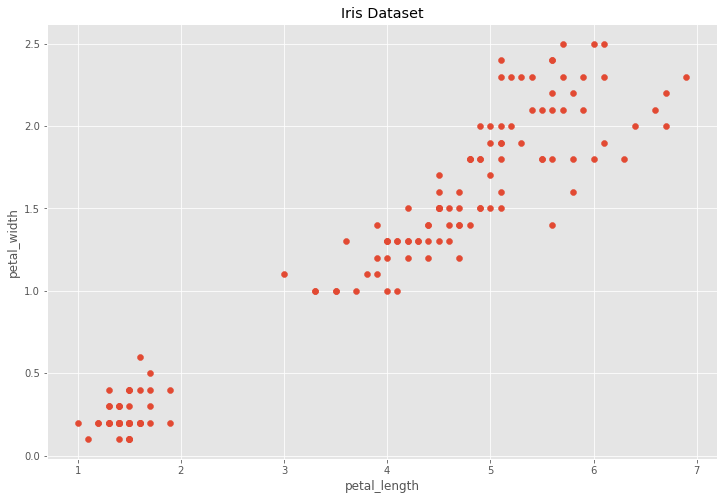

In [ ]:
#use your own idea to visualize the data


fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(iris['petal_length'], iris['petal_width'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')




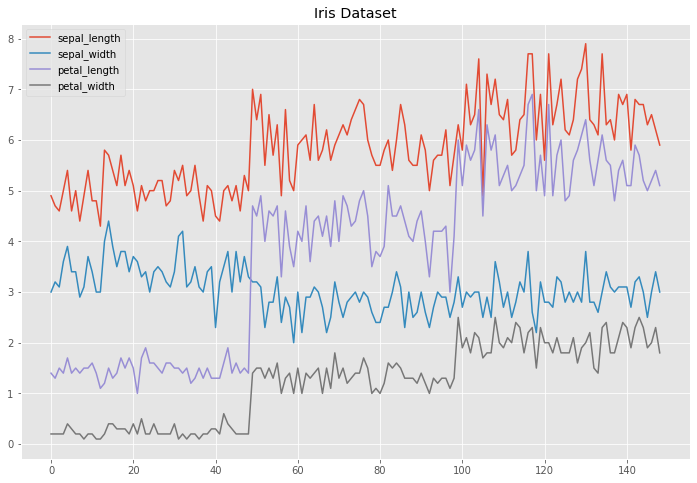

In [ ]:
columns = iris.columns.drop(['target_class'])
# create x data
x_data = range(0, iris.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, iris[column], label=column)
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

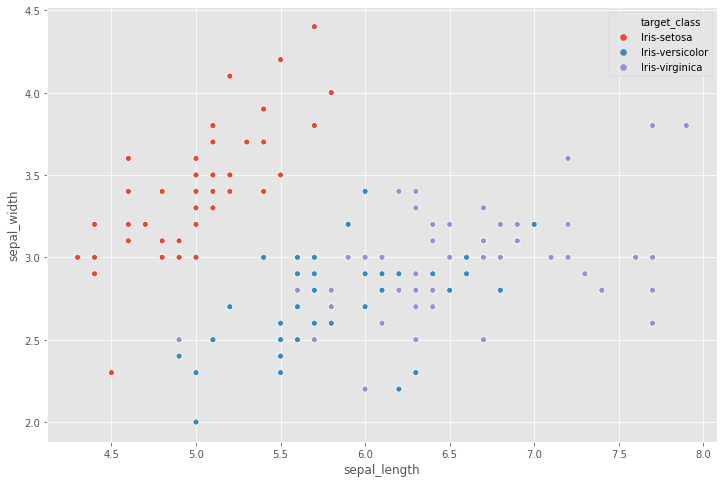

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='target_class', data=iris)

# Step 3: Data Pre-Processing

In [ ]:
X = iris.iloc[:, 0:4].values #feature matrix
Y = iris.target_class.values #target vector


In [ ]:

def normalize(X):
    mu = np.mean(X, axis=0)  
    std = np.std(X, axis=0)
    std_filled = std.copy()
    
    if np.all(std_filled == 1):
      std=0
      Xbar = (X-mu)/std
    else:

      Xbar = (X-mu)/std           
      return Xbar


In [ ]:
X=normalize(X)
X

array([[-1.1483555 , -0.11805969, -1.35396443, -1.32506301],
       [-1.3905423 ,  0.34485856, -1.41098555, -1.32506301],
       [-1.51163569,  0.11339944, -1.29694332, -1.32506301],
       [-1.02726211,  1.27069504, -1.35396443, -1.32506301],
       [-0.54288852,  1.9650724 , -1.18290109, -1.0614657 ],
       [-1.51163569,  0.8077768 , -1.35396443, -1.19326436],
       [-1.02726211,  0.8077768 , -1.29694332, -1.32506301],
       [-1.75382249, -0.34951881, -1.35396443, -1.32506301],
       [-1.1483555 ,  0.11339944, -1.29694332, -1.45686167],
       [-0.54288852,  1.50215416, -1.29694332, -1.32506301],
       [-1.2694489 ,  0.8077768 , -1.23992221, -1.32506301],
       [-1.2694489 , -0.11805969, -1.35396443, -1.45686167],
       [-1.87491588, -0.11805969, -1.52502777, -1.45686167],
       [-0.05851493,  2.19653152, -1.46800666, -1.32506301],
       [-0.17960833,  3.122368  , -1.29694332, -1.0614657 ],
       [-0.54288852,  1.9650724 , -1.41098555, -1.0614657 ],
       [-0.90616871,  1.

# Step 4: Computaion of Eigen Values & Eigen Vectors

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [ ]:
#calculate covariance_matrix using numpy

#A=iris.loc[: , "sepal_length"]
#B=iris.loc[: , "sepal_width"]
#C=iris.loc[: , "petal_length"]
#D=iris.loc[: , "petal_width"]
#data = np.array([A,B,C,D])

#covariance_matrix = np.cov(data,bias=True)


#print("Covariance Matrix \n", covariance_matrix)

In [ ]:
import numpy as np
mean_vec = np.mean(X, axis=0)
covariance_matrix = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %covariance_matrix)

Covariance matrix 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


We can prove it by looking at the covariance matrix. It has the property that it is symmetric.
We also constrain the each of the columns (eigenvectors) such that the values sum to 1. 
Thus, they are orthonormal to each other.

Eigen decomposition of covariance matrix : $Σ = W\wedge W^{-1}$

W is the matrix composed by total eigenvectors, $\wedge$ is the diagonal matrix with all eigenvalues in diagonal.  

In [ ]:
#calculate eigen_values, eigen_vectors using numpy

from numpy import linalg as LA

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)


print("Eigenvectors \n", eigen_vectors, "\n")
print("Eigenvalues \n", eigen_values, "\n")

Eigenvectors 
 [[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]] 

Eigenvalues 
 [2.92442837 0.93215233 0.14946373 0.02098259] 



In [ ]:
 idx = eigen_values.argsort()[::-1]
 eigen_values = eigen_values[idx]
 eigen_vectors = eigen_vectors[:,idx]
 

# Step 5: Singular Value Decomposition (SVD)

This is basically used to diagonalize the feature matrix when it is not a square matrix.

In [ ]:
evec_svd, s, v = np.linalg.svd(X.T)
print("Eigenvectors \n", evec_svd, "\n")

#here, we just interested in directions of vector, so sign doesn't matter

Eigenvectors 
 [[-0.52308496 -0.36956962  0.72154279  0.26301409]
 [ 0.25956935 -0.92681168 -0.2411952  -0.12437342]
 [-0.58184289 -0.01912775 -0.13962963 -0.80099722]
 [-0.56609604 -0.06381646 -0.63380158  0.52321917]] 



What is major difference between EVD & SVD?
- in eigen value decomposition we use only one basis that is eigen vector where as in singular value decomposition we use two basis left and right singular vector.

# Step 6: Picking Principal Components Using the Explained Variance

In [ ]:
for val in eigen_values:
    print(val)

2.9244283691111117
0.9321523302535064
0.14946373489813353
0.020982592764270593


In [ ]:
variance_explained = [(i/sum(eigen_values))*100 for i in eigen_values]
print("Variance Explained: \n", variance_explained)

#72% variance in our data is explained by the first eigen-value i.e, 2.930...

Variance Explained: 
 [72.62003332692032, 23.14740685864415, 3.7115155645845284, 0.5210442498510154]


In [ ]:
eig_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9244283691111117
0.9321523302535064
0.14946373489813353
0.020982592764270593


In [ ]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

#If we used only 1st eigen value to choose principal components, We will be able to capture 72% of our data.
# If we choose 2 eigen values, 95% is handled and so on...

[ 72.62003333  95.76744019  99.47895575 100.        ]


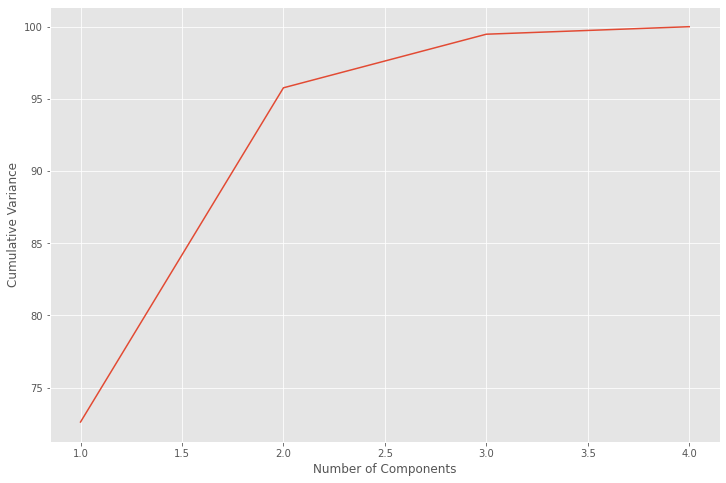

In [ ]:
sns.lineplot(x = [1, 2, 3, 4], y = cumulative_variance_explained)
plt.xlabel ('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

# Step 7: Project Data onto Lower Dimensional Linear Subspace

In [ ]:
eigen_vectors

array([[ 0.52308496, -0.36956962, -0.72154279,  0.26301409],
       [-0.25956935, -0.92681168,  0.2411952 , -0.12437342],
       [ 0.58184289, -0.01912775,  0.13962963, -0.80099722],
       [ 0.56609604, -0.06381646,  0.63380158,  0.52321917]])

In [ ]:
aa = eigen_vectors.T[:][:]
bb = aa[:2]
projection_matrix = bb.T
projection_matrix

array([[ 0.52308496, -0.36956962],
       [-0.25956935, -0.92681168],
       [ 0.58184289, -0.01912775],
       [ 0.56609604, -0.06381646]])

In [ ]:
x_pca = X.dot(projection_matrix)
x_pca

array([[-2.10795032,  0.64427554],
       [-2.38797131,  0.30583307],
       [-2.32487909,  0.56292316],
       [-2.40508635, -0.687591  ],
       [-2.08320351, -1.53025171],
       [-2.4636848 , -0.08795413],
       [-2.25174963, -0.25964365],
       [-2.3645813 ,  1.08255676],
       [-2.20946338,  0.43707676],
       [-2.17862017, -1.08221046],
       [-2.34525657, -0.17122946],
       [-2.24590315,  0.6974389 ],
       [-2.66214582,  0.92447316],
       [-2.2050227 , -1.90150522],
       [-2.25993023, -2.73492274],
       [-2.21591283, -1.52588897],
       [-2.20705382, -0.52623535],
       [-1.9077081 , -1.4415791 ],
       [-2.35411558, -1.17088308],
       [-1.93202643, -0.44083479],
       [-2.21942518, -0.96477499],
       [-2.79116421, -0.50421849],
       [-1.83814105, -0.11729122],
       [-2.24572458, -0.17450151],
       [-1.97825353,  0.59734172],
       [-2.06935091, -0.27755619],
       [-2.18514506, -0.56366755],
       [-2.15824269, -0.34805785],
       [-2.28843932,

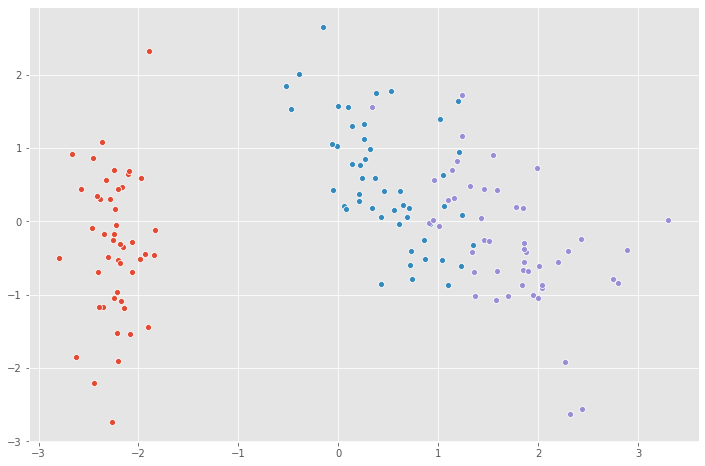

In [ ]:
for target_class in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    sns.scatterplot (x_pca[Y == target_class, 0], 
                     x_pca[Y == target_class, 1])

# Can we classify after dimensionality reduction?

https://towardsdatascience.com/dimensionality-reduction-does-pca-really-improve-classification-outcome-6e9ba21f0a32

Explain here:
dimensionality reduction is the common preprocessing step for classification and dimensionality reduction produce many benifit like it learn better classifier during training, learning time is fast. there is many benifit of dimensionality reduction because it remove noise from the dataset and help to make proper dataset so that accuracay will be good and can classify. if the dimensional is reduce than it will save time because less dimension require less time and it also save storage because if there is more dimension than it will accquire more space. if we perform dimensional reduction it will remove dataset having more correlation between them which improve the performance of the model. if we have more dimensional data than it will be difficult for visualization so during different pharse it will to difficult to select the next step but if the dimensional is reduce to minimuze than it will be easy for visualization so that next step will be clear which will prdocue better results but if the dataset is small and if we do dimensional reduction that some feature may be loss during reducion which may effect the accuracy and classification. 

from the below example we can see it we train model without PCA then the accuracy will be 95% but if we use PCA and reduce dimension from 4 to 2 we will have accuracy of 96%.


### Accuracy of iris dataset without dimensional reduction

In [ ]:
X = iris.drop('target_class', 1)
y = iris['target_class']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20, stratify=y)

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.957983193277311 %
Test score before PCA 1.0 %


### Accuracy of model after PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance


array([0.84013148, 0.11820244, 0.03525228, 0.0064138 ])

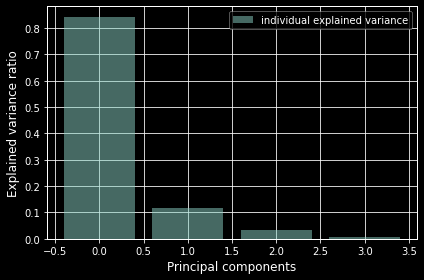

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
pca=PCA(n_components=2)
X_new=pca.fit_transform(X)

In [ ]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=20, stratify=y)


In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9663865546218487 %
Test score after PCA 0.9 %
